# App S&P 500

Selectors:
- Sectors
- Companies

Function:
    - Scrape Wikipedia S&P 500 table
    - Get DF

Getting unique sectors
Showing the first company of each of the unique sectors

Will get the ticker symbols for the specified or selected sectors
Will use Yahoo Finance to filter and gather the data from the ticker symbols to get Closing Price (USD)




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns

import streamlit as st
import base64
import yfinance as yf


In [12]:
#@st.cache_data
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

df = load_data()
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [27]:

df.head()
#df.columns
##Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
##       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
##      dtype='object')

## Will group by sector 'GICS'


sorted_sector_unique = sorted(df['GICS Sector'].unique())
sorted_sector_unique
## Will use these to make them selectors on the website

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [29]:
selected_sector = st.sidebar.multiselect('Sector',sorted_sector_unique,sorted_sector_unique)

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [32]:
selected_sector_01 = ['Communication Services','Consumer Discretionary']
#df[(df['GICS Sector'].isin(selected_sector_01))]['GICS Sector'].value_counts()
df_selected_sector = df[(df['GICS Sector'].isin(selected_sector_01))]
df_selected_sector

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
22,GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
23,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,1652044,1998
25,AMZN,Amazon,Consumer Discretionary,Broadline Retail,"Seattle, Washington",2005-11-18,1018724,1994
...,...,...,...,...,...,...,...,...
473,VFC,VF Corporation,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Denver, Colorado",1979-06-30,103379,1899
481,WBD,Warner Bros. Discovery,Communication Services,Broadcasting,"New York City, New York",2022-04-11,1437107,2022
491,WHR,Whirlpool Corporation,Consumer Discretionary,Household Appliances,"Benton Harbor, Michigan",NaN,106640,1911
495,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002


[*********************100%***********************]  10 of 10 completed


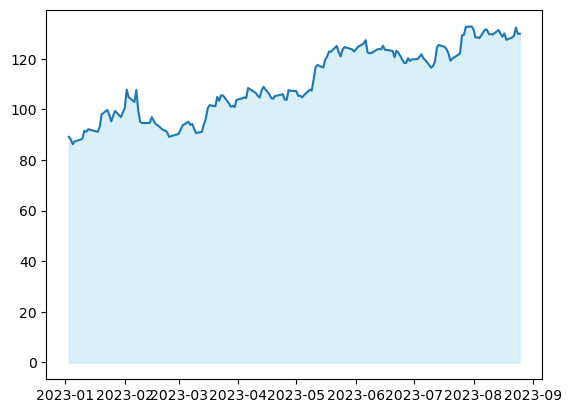

In [71]:
## Example
selected_sector_01 = ['Communication Services','Consumer Discretionary']
#df[(df['GICS Sector'].isin(selected_sector_01))]['GICS Sector'].value_counts()
df_selected_sector = df_selected_sector[(df_selected_sector['GICS Sector'].isin(selected_sector_01))]
df_selected_sector

## https://pypi.org/project/yfinance/
data = yf.download(
    tickers = list(df_selected_sector[0:10]['Symbol']),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost=True,
    threads=True,
    proxy=None
)

#data
## Note: symbol not in []
symbol = 'GOOGL'
df = pd.DataFrame(data[symbol]['Close'])
df['Date'] = df.index
df.head()

plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.3)
## Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
##plt.plot(df['Date'], df['Close'])
## Solution
plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy())

plt.show()

In [ ]:
st.title('S&P 500 App')

st.markdown("""
This App retrieves information of the S&P 500 (From Wikipedia) and its corresponding **stock closing price** (Year-to-date)
Data Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
""")

st.sidebar.header('User Input Features')

## Web Scraping S&P 500 Data
@st.cache_data
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby(by='GICS Sector')

## Sidebar - Sector Selection
sorted_sector_unique = sorted(df['GICS Sector'].unique())
selected_sector = st.sidebar.multiselect('Sector',sorted_sector_unique,sorted_sector_unique)

## Filtering Data based on
## Sector
df_selected_sector = df[(df['GICS Sector'].isin(selected_sector))]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector[0]) + ' rows and ' + str(df_selected_sector[1]) + ' columns.')
st.dataframe(df_selected_sector)

## Download S&P Data to csv format
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <-> Bytes
    href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)

## https://pypi.org/project/yfinance/
data = yf.download(
    tickers = list(df_selected_sector[:10]['Symbol']),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost=True,
    threads=True,
    proxy=None
)

## Plot Closing Price
def price_plot(symbol):
    df = pd.DataFrame(data[symbol]['Close'])
    df['Date'] = df.index
    plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.3)
    
    ## Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
    ##plt.plot(df['Date'], df['Close'])
    ## Solution
    plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy())
    
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price (USD)', fontweight='bold')
    plt.title(symbol, fontweight='bold')
    #plt.show()
    return st.pyplot

## Slider from 1 to 5
num_company = st.sidebar.slider("Number of companies", 1, 5)

if st.button("Show Plots"):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector['Symbol'])[:num_company]
    price_plot(i)



## Semi Final

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import streamlit as st
import base64
import yfinance as yf


st.title('S&P 500 App')

st.markdown("""
This App retrieves information of the S&P 500 (From Wikipedia) and its corresponding **stock closing price** (Year-to-date)
Data Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
""")

st.sidebar.header('User Input Features')

## Web Scraping S&P 500 Data
@st.cache_data
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby(by='GICS Sector')

## Sidebar - Sector Selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

## Filtering Data based on
## Sector
## Filtering out from the entire DataFrame The selected sectors
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

## Download S&P Data to csv format
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <-> Bytes Conversion
    ## Error:
    #href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a>'
    ## Solution:
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)


## Retrieve YF Stock Price Data
## Way 01 pdr.get_data_yahoo(...) tickers list or string as well
## https://pypi.org/project/yfinance/
data = yf.download(
    tickers = list(df_selected_sector[:10]['Symbol']),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None
)


## Plot Closing Price
def price_plot(symbol):
    df = pd.DataFrame(data[symbol]['Close'])
    df['Date'] = df.index
    plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.3)
    
    ## Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
    ##plt.plot(df['Date'], df['Close'])
    ## Solution
    plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy(), alpha=0.8)
    
    plt.xticks(rotation=90)
    
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price (USD)', fontweight='bold')
    
    plt.title(symbol, fontweight='bold')
    
    #plt.show()
    
    return st.pyplot


## Slider from 1 to 5
num_company = st.sidebar.slider("Number of companies", 1, 5)

if st.button("Show Plots"):
    st.header('Stock Closing Price')
    ## All rows and all columns from 1 to x in this case 5: then plot
    for i in list(df_selected_sector['Symbol'])[:num_company]:
        price_plot(i)



2023-08-27 18:31:17.988 No runtime found, using MemoryCacheStorageManager


[*********************100%***********************]  10 of 10 completed


In [78]:
#! streamlit run '.../App_005_001_001.ipynb'


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import streamlit as st
import base64
import yfinance as yf


st.title('S&P 500 App')

st.markdown("""
This App retrieves information of the S&P 500 (From Wikipedia) and its corresponding **stock closing price** (Year-to-date)
Data Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
""")

st.sidebar.header('User Input Features')

## Web Scraping S&P 500 Data
@st.cache_data
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby(by='GICS Sector')

## Sidebar - Sector Selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

## Filtering Data based on
## Sector
## Filtering out from the entire DataFrame The selected sectors
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

## Download S&P Data to csv format
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <-> Bytes Conversion
    ## Error:
    #href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a>'
    ## Solution:
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)


## Retrieve YF Stock Price Data
## Way 01 pdr.get_data_yahoo(...) tickers list or string as well
## https://pypi.org/project/yfinance/
data = yf.download(
    tickers = list(df_selected_sector[:10]['Symbol']),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None
)


## Plot Closing Price
def price_plot(symbol):
    df = pd.DataFrame(data[symbol]['Close'])
    df['Date'] = df.index
    plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.3)
    
    ## Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
    ##plt.plot(df['Date'], df['Close'])
    ## Solution
    plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy(), alpha=0.8)
    
    plt.xticks(rotation=90)
    
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price (USD)', fontweight='bold')
    
    plt.title(symbol, fontweight='bold')
    
    #plt.show()
    
    return st.pyplot()


## Slider from 1 to 5
num_company = st.sidebar.slider("Number of companies", 1, 5)

## All rows and all columns from 1 to x in this case 5: then plot
if st.button('Show Plots'):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector['Symbol'])[:num_company]:
        price_plot(i)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

import streamlit as st
import base64
import yfinance as yf


st.title('S&P 500 App')

st.markdown("""
This App retrieves information of the S&P 500 (From Wikipedia) and its corresponding **stock closing price** (Year-to-date)
Data Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
""")

st.sidebar.header('User Input Features')

## Web Scraping S&P 500 Data
@st.cache_data
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header = 0)
    df = html[0]
    return df

df = load_data()
sector = df.groupby(by='GICS Sector')

## Sidebar - Sector Selection
sorted_sector_unique = sorted( df['GICS Sector'].unique() )
selected_sector = st.sidebar.multiselect('Sector', sorted_sector_unique, sorted_sector_unique)

## Filtering Data based on
## Sector
## Filtering out from the entire DataFrame The selected sectors
df_selected_sector = df[ (df['GICS Sector'].isin(selected_sector)) ]

st.header('Display Companies in Selected Sector')
st.write('Data Dimension: ' + str(df_selected_sector.shape[0]) + ' rows and ' + str(df_selected_sector.shape[1]) + ' columns.')
st.dataframe(df_selected_sector)

## Download S&P Data to csv format
## https://discuss.streamlit.io/t/how-to-download-file-in-streamlit/1806
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode() ## Strings <-> Bytes Conversion
    ## Error:
    #href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a>'
    ## Solution:
    href = f'<a href="data:file/csv;base64,{b64}" download="SP500.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_sector), unsafe_allow_html=True)


## Retrieve YF Stock Price Data
## Way 01 pdr.get_data_yahoo(...) tickers list or string as well
## https://pypi.org/project/yfinance/
data = yf.download(
    tickers = list(df_selected_sector[:10]['Symbol']),
    period = "ytd",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True,
    threads = True,
    proxy = None
)


## Plot Closing Price
def price_plot(symbol):
    df = pd.DataFrame(data[symbol]['Close'])
    df['Date'] = df.index
    plt.fill_between(df['Date'], df['Close'], color='skyblue', alpha=0.3)
    
    ## Error: ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.
    ##plt.plot(df['Date'], df['Close'])
    ## Solution
    plt.plot(df['Date'].to_numpy(), df['Close'].to_numpy(), alpha=0.8)
    
    plt.xticks(rotation=90)
    
    plt.xlabel('Date', fontweight='bold')
    plt.ylabel('Closing Price (USD)', fontweight='bold')
    
    plt.title(symbol, fontweight='bold')
    
    #plt.show()
    
    return st.pyplot()


## Slider from 1 to 5
num_company = st.sidebar.slider("Number of companies", 1, 5)

## All rows and all columns from 1 to x in this case 5: then plot
if st.button('Show Plots'):
    st.header('Stock Closing Price')
    for i in list(df_selected_sector['Symbol'])[:num_company]:
        price_plot(i)
